<a href="https://colab.research.google.com/github/Rizki-132/Allmateri/blob/main/Klasifikasi_program_PKH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from google.colab import data_table
from sklearn.metrics import accuracy_score

Import Data

In [47]:
data = pd.read_csv('data_program_pkh.csv')
data_table.enable_dataframe_formatter()
data

,nama,umur,tempat lahir,jenis pekerjaan,jumlah penghasilan,jenis kelamin,jumlah keluarga (SD),jumlah keluarga (SMP),jumlah keluarga (SMA),status perkawinan,penerima PKH
0,HENI SUKMAENI,41,Majalengka,Guru,1383377,Perempuan,1,2,2,Duda,0
1,SAID,58,Majalengka,Satpam,1750067,Laki-laki,0,3,0,Duda,0
2,AAN KUSNAEDI,63,Majalengka,Sopir,1838230,Laki-laki,3,1,2,Janda,0
3,NUNUNG NURHAYATI,39,Majalengka,Dokter,356279,Laki-laki,1,0,2,Menikah,0
4,NURBAETI,35,Majalengka,PNS,1633686,Perempuan,2,2,3,Janda,0
...,...,...,...,...,...,...,...,...,...,...,...
320,MUSTAMAN,51,Majalengka,Buruh,1790521,Perempuan,0,2,3,Belum Menikah,0
321,SUSI,60,Majalengka,Petani,1023910,Perempuan,2,2,1,Janda,0
322,WARNITA,18,Majalengka,Pengangguran,1848002,Perempuan,2,2,3,Duda,0
323,SAKER,25,Majalengka,Guru,575637,Laki-laki,1,2,0,Menikah,0


#Data Understanding

In [3]:
print("data shape", data.shape)

data shape (325, 11)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   nama                   325 non-null    object
 1   umur                   325 non-null    int64 
 2   tempat lahir           325 non-null    object
 3   jenis pekerjaan        325 non-null    object
 4   jumlah penghasilan     325 non-null    int64 
 5   jenis kelamin          325 non-null    object
 6   jumlah keluarga (SD)   325 non-null    int64 
 7   jumlah keluarga (SMP)  325 non-null    int64 
 8   jumlah keluarga (SMA)  325 non-null    int64 
 9   status perkawinan      325 non-null    object
 10  penerima PKH           325 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 28.1+ KB


In [5]:
data[['umur','jumlah penghasilan', 'jumlah keluarga (SD)', 'jumlah keluarga (SMP)', 'jumlah keluarga (SMA)']].describe()

,umur,jumlah penghasilan,jumlah keluarga (SD),jumlah keluarga (SMP),jumlah keluarga (SMA)
count,325.000000,3.250000e+02,325.000000,325.000000,325.000000
mean,40.803077,9.634554e+05,1.473846,1.455385,1.535385
std,13.666147,5.754937e+05,1.112538,1.052045,1.120575
min,18.000000,1.108500e+04,0.000000,0.000000,0.000000
25%,30.000000,4.554220e+05,0.000000,1.000000,1.000000
50%,40.000000,9.374170e+05,1.000000,1.000000,2.000000
75%,52.000000,1.463674e+06,2.000000,2.000000,3.000000
max,65.000000,1.994183e+06,3.000000,3.000000,3.000000


In [6]:
df_penerima = data['penerima PKH']
df_penerima.value_counts()

penerima PKH
0    211
1    114
Name: count, dtype: int64

#Cleaning Data

In [7]:
data.isnull().sum()

nama                     0
umur                     0
tempat lahir             0
jenis pekerjaan          0
jumlah penghasilan       0
jenis kelamin            0
jumlah keluarga (SD)     0
jumlah keluarga (SMP)    0
jumlah keluarga (SMA)    0
status perkawinan        0
penerima PKH             0
dtype: int64

In [8]:
#mencari duplikasi
data.duplicated().sum()

0

#Exploratory Data Analysisi(EDA)

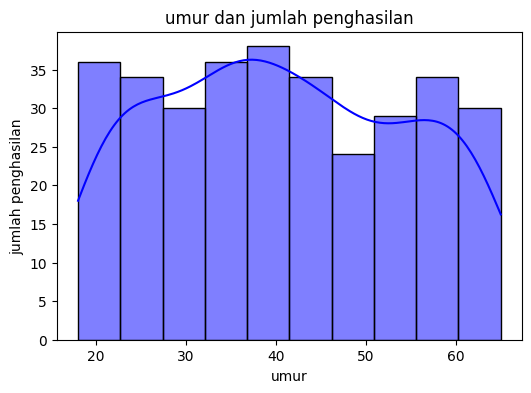

In [9]:
# @title umur vs jumlah penghasilan
plt.figure(figsize=(6,4))
sns.histplot(data=data, x='umur', bins=10, kde=True, color='blue')
plt.title('umur dan jumlah penghasilan')
plt.xlabel('umur')
plt.ylabel('jumlah penghasilan')
plt.show()

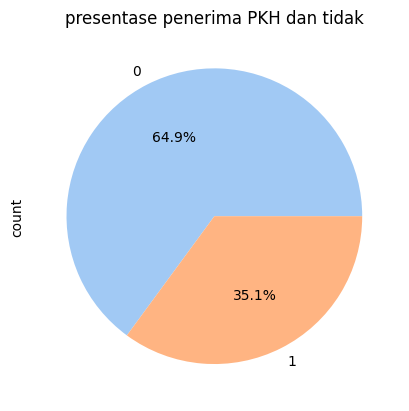

In [10]:
sns.set_palette('pastel')
data['penerima PKH'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('presentase penerima PKH dan tidak')
plt.show()

<ipython-input-11-105dbb74c760>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='penerima PKH', palette='rocket')


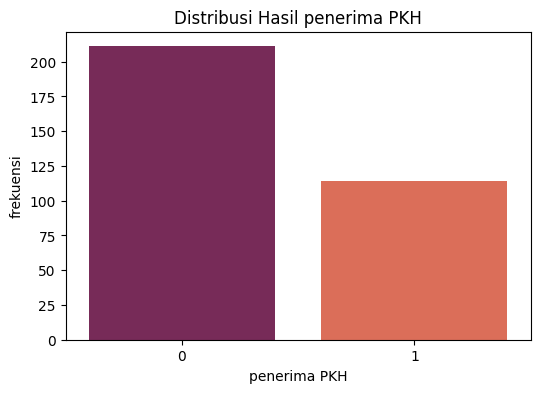

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='penerima PKH', palette='rocket')
plt.title('Distribusi Hasil penerima PKH')
plt.xlabel('penerima PKH')
plt.ylabel('frekuensi')
plt.show()

In [146]:
#untuk menperbaiki data yang tidak bisa di korelasi dan langkah ini juga menghilangka kolom berisi string seperti nama
numeric_data = data.select_dtypes(include=[float, int])
correlation_matrix = numeric_data.corr()
correlation_matrix

,umur,jumlah penghasilan,jumlah keluarga (SD),jumlah keluarga (SMP),jumlah keluarga (SMA),penerima PKH
umur,1.000000,-0.047898,-0.044797,-0.016499,0.013154,0.013443
jumlah penghasilan,-0.047898,1.000000,0.049391,0.070606,-0.016501,-0.579585
jumlah keluarga (SD),-0.044797,0.049391,1.000000,-0.016163,0.127625,0.214657
jumlah keluarga (SMP),-0.016499,0.070606,-0.016163,1.000000,-0.032037,0.209228
jumlah keluarga (SMA),0.013154,-0.016501,0.127625,-0.032037,1.000000,0.189978
penerima PKH,0.013443,-0.579585,0.214657,0.209228,0.189978,1.000000


In [147]:
categorical_data = data.select_dtypes(exclude=[float, int])
print("Kolom kategorikal:\n", categorical_data)

Kolom kategorikal:
                  nama tempat lahir jenis pekerjaan jenis kelamin  \
0       HENI SUKMAENI   Majalengka            Guru     Perempuan   
1                SAID   Majalengka          Satpam     Laki-laki   
2        AAN KUSNAEDI   Majalengka           Sopir     Laki-laki   
3    NUNUNG NURHAYATI   Majalengka          Dokter     Laki-laki   
4            NURBAETI   Majalengka             PNS     Perempuan   
..                ...          ...             ...           ...   
320          MUSTAMAN   Majalengka           Buruh     Perempuan   
321              SUSI   Majalengka          Petani     Perempuan   
322           WARNITA   Majalengka    Pengangguran     Perempuan   
323             SAKER   Majalengka            Guru     Laki-laki   
324            NURIAH   Majalengka          Dokter     Perempuan   

    status perkawinan  
0                Duda  
1                Duda  
2               Janda  
3             Menikah  
4               Janda  
..                .

<Axes: >

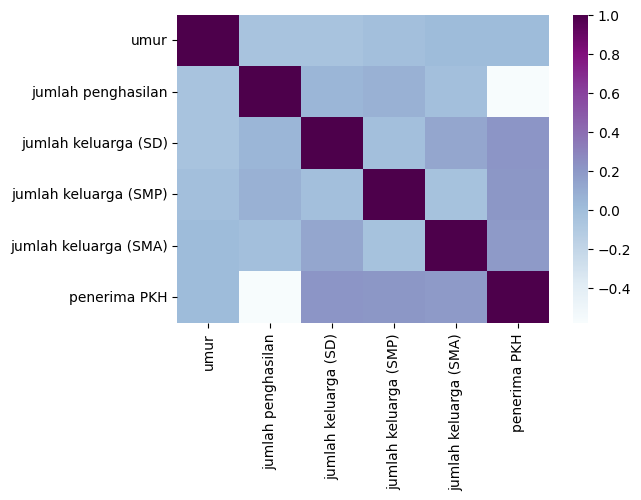

In [148]:
#jika nilai mendekati angka 1 maka warna nya ungu pekat, dan jika warna nya pudar maka korelasi tersebut tidak cukup baik
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, cmap='BuPu')

#Preparation Data

In [149]:
scaler = StandardScaler()
scaled_numeric_data = scaler.fit_transform(numeric_data)
scaled_numeric_df = pd.DataFrame(scaled_numeric_data, columns=numeric_data.columns)
scaled_numeric_df

,umur,jumlah penghasilan,jumlah keluarga (SD),jumlah keluarga (SMP),jumlah keluarga (SMA),penerima PKH
0,0.014432,0.730797,-0.426572,0.518471,0.415262,-0.735040
1,1.260300,1.368954,-1.326804,1.470466,-1.372288,-0.735040
2,1.626731,1.522386,1.373893,-0.433524,0.415262,-0.735040
3,-0.132141,-1.056680,-0.426572,-1.385519,0.415262,-0.735040
4,-0.425286,1.166414,0.473661,0.518471,1.309037,-0.735040
...,...,...,...,...,...,...
320,0.747295,1.439357,-1.326804,0.518471,1.309037,-0.735040
321,1.406872,0.105210,0.473661,0.518471,-0.478513,-0.735040
322,-1.671154,1.539392,0.473661,0.518471,1.309037,-0.735040
323,-1.158150,-0.674927,-0.426572,0.518471,-1.372288,-0.735040


In [150]:
# karena menggunakan perinta "select_dtypes(include=[float, int])" maka yang bertype string tidak terbaca
X = scaled_numeric_df.drop(columns=['penerima PKH'])
y = scaled_numeric_df['penerima PKH']

print("X : ", X.shape)
print("y : ", y.shape)

X :  (325, 5)
y :  (325,)


In [151]:
scaler.fit(X)
X = scaler.transform(X)
y_categories = pd.cut(y, bins=2, labels=[0, 1])

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y_categories, test_size=0.2, random_state=42)

#Modeling dan Evaluasi

In [153]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

CLF_acc = accuracy_score(y_pred, y_test)
print(classification_report(y_pred, y_test))
print("Akurasi model SVM : {:.2f}%".format(CLF_acc*100))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.84      0.95      0.89        22

    accuracy                           0.92        65
   macro avg       0.91      0.93      0.92        65
weighted avg       0.93      0.92      0.92        65

Akurasi model SVM : 92.31%


#Testing

In [159]:
new_data = {'Nama' : ['Memed'],
            'umur': [16],
            'jenis pekerjaan': ['PNS'],
            'jumlah penghasilan' : [500000],
            'jumlah keluarga (SD)' : [1],
            'jumlah keluarga (SMP)' :[0],
            'jumlah keluarga (SMA)' : [3],
            'status perkawinan ' : ['Duda']
}
new_data = pd.DataFrame(new_data)
new_data

,Nama,umur,jenis pekerjaan,jumlah penghasilan,jumlah keluarga (SD),jumlah keluarga (SMP),jumlah keluarga (SMA),status perkawinan
0,Memed,16,PNS,500000,1,0,3,Duda


In [160]:
# Memilih kolom numerik saja dari data baru
numeric_new_data = new_data.select_dtypes(include=[float, int])

# Menyimpan kolom kategorikal dari data baru
categorical_new_data = new_data.select_dtypes(exclude=[float, int])

# Menampilkan kolom numerik dan kategorikal dari data baru
# print("Kolom numerik pada data baru:", numeric_new_data)
# print("Kolom kategorikal pada data baru:", categorical_new_data)

In [161]:
# Transformasi data numerik baru menggunakan scaler yang sudah di-fit
scaled_numeric_new_data = scaler.transform(numeric_new_data)

# Membuat DataFrame untuk data numerik baru yang sudah di-scale
scaled_numeric_new_data_df = pd.DataFrame(scaled_numeric_new_data, columns=numeric_new_data.columns)

# Menampilkan data numerik baru yang sudah di-scale
# print("Data numerik baru yang sudah di-scale:\n", scaled_numeric_new_data_df)

In [162]:
# Menggabungkan kembali kolom kategorikal dan kolom numerik yang sudah di-scale
final_new_data = pd.concat([categorical_new_data.reset_index(drop=True), scaled_numeric_new_data_df.reset_index(drop=True)], axis=1)

In [163]:
# Asumsikan clf_svm adalah model SVM yang sudah dilatih
# Misalnya: clf_svm.fit(X_train_scaled, y_train)

# Prediksi menggunakan data numerik yang sudah di-scale
scaled_new_data = scaler.transform(numeric_new_data)
y_pred_new = clf.predict(scaled_new_data)

print("Prediksi:", y_pred_new)

Prediksi: [0]
